In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n=750
X = np.linspace(-5,5, n)
y_flat = 4*X-3

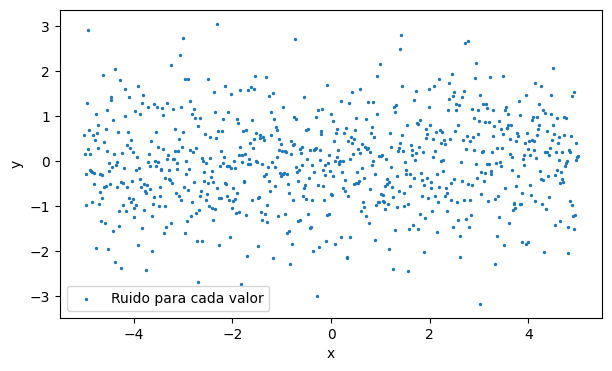

In [31]:
noise = np.random.randn(n)

y = y_flat + noise
noise

plt.figure(figsize=(7,4))
plt.scatter(X,
            noise,
            s = 2,   ## dot size
            label='Ruido para cada valor')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

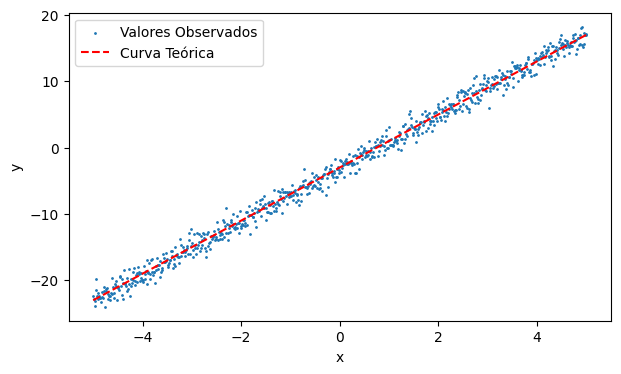

In [32]:
plt.figure(figsize=(7,4))
plt.scatter(X,
            y,
            s = 1,   ## dot size
            label='Valores Observados')
plt.plot(X, y_flat, '--',  label='Curva Teórica', c='r')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

X_reshaped = X.reshape(-1,1)
# The -1 means that the size of that dimension is inferred to make the total number of elements unchanged.
# The 1 in the second dimension means that each element will be in its own inner array (i.e., a column vector).

X_reshaped


In [45]:
linear_model.fit(X_reshaped, y)

LinearRegression()

In [46]:
print('pendiente sklearn =', linear_model.coef_, ' y su ord. al origen =', linear_model.intercept_)

pendiente sklearn = [4.02130932]  y su ord. al origen = -3.0284982699534715


In [53]:
# Now we are gonna split the data in two separate groups. One to calculate the coefficients and the other to test the result.
# This splitting is crucial in machine learning to evaluate how well a model trained on the training set generalizes to new, unseen data (the test set).
# It helps in assessing the model's performance and detecting overfitting or underfitting.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size = 0.3, random_state = 42)

# 'test_size' is the proportion of the dataset to include in the test split.
# In this case, it's set to 0.3, meaning 30% of the data will be used for testing, and 70% for training.

# 'random_state' When you set a specific value for random_state (for example, random_state=42), you make the random process deterministic.
# This means that every time you run the script or code snippet with the same random_state value, you'll get the same split of the data into training and test sets.


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(525, 1) (525,) (225, 1) (225,)


In [54]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [56]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

coefficients, intercept

(array([4.03181335]), -3.0523819773609917)

In [ ]:
y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

# After these predictions are made, you can use them to evaluate the performance of your linear regression model.
# Typically, you would compare these predicted values (y_train_predict and y_test_predict)
# with the actual target values (y_train and y_test) to assess how well your model generalizes to new, unseen data.

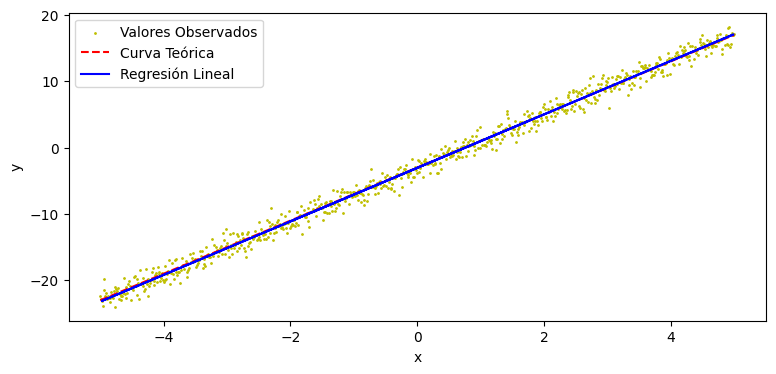

In [74]:
plt.figure(figsize=(9,4))
plt.scatter(X,
            y,
            s = 1,   ## dot size
            label='Valores Observados',
            c='y')
plt.plot(X, y_flat, '--',  label='Curva Teórica', c='r')
plt.plot(X_test, y_test_predict, label='Regresión Lineal', c='b')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

plt.show()

In [85]:
import warnings

from sklearn.metrics import mean_squared_error 
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)

# Root Mean Squared Error (RMSE): provides a measure of the average magnitude of the errors between predicted and actual values.
# A lower RMSE indicates better model performance.


# Training Set RMSE: The squared=False parameter is specified to get the RMSE instead of the MSE.
rmse_train = mean_squared_error(y_train, y_train_predict, squared = False)

# Test Set RMSE: The squared=False parameter is specified to get the RMSE instead of the MSE.
rmse_test = mean_squared_error(y_test, y_test_predict, squared = False)


print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 0.9850625215802149
Raíz del error cuadrático medio en Test: 1.0342972077272874


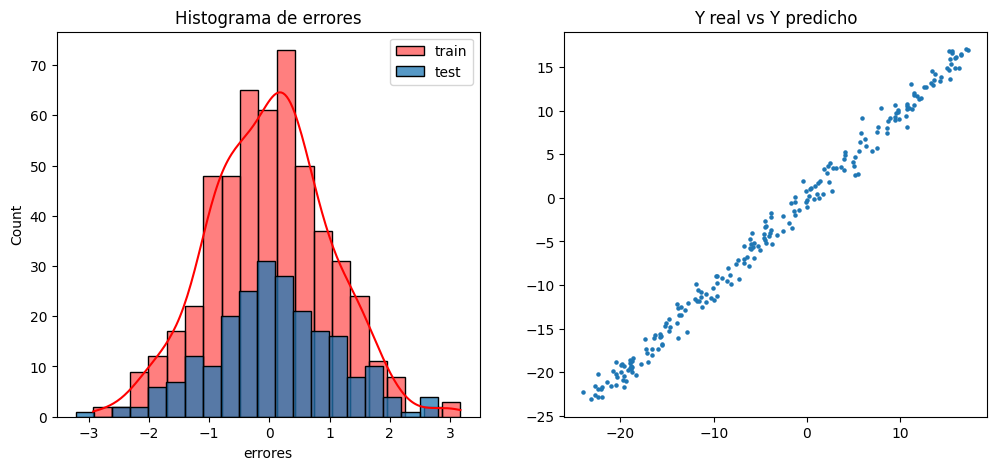

In [99]:
plt.figure(figsize = (12,5))

# This code is creating a subplot with two plots side by side (1 row, 2 columns) and then plotting histograms of the errors on both the training and test sets.

# Create a subplot with 1 row (1,..,..), 2 columns (..,2,..), and select the first plot (leftmost) (..,..,1)
plt.subplot(1,2,1)

# Set the title of the first plot
plt.title('Histograma de errores')

# Plot the histogram of errors for the training set using seaborn's histplot
sns.histplot(y_train - y_train_predict, bins = 20, label = 'train', color = 'r', kde = True) # 'kde=True' overlays a kernel density estimate on top of the histogram

# Plot the histogram of errors for the test set using seaborn's histplot
sns.histplot(y_test - y_test_predict, bins = 20, label = 'test')

plt.xlabel('errores')

plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)

plt.title('Y real vs Y predicho')

ax.scatter(y_test,y_test_predict, s=5, label = 'Y real')
lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # calculates the limits for the x-axis and y-axis based on the minimum and maximum values of the current axes (ax.get_xlim() and ax.get_ylim()). 
        np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]

In [102]:
lims

[-26.03671204511156, 19.298719430423866]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


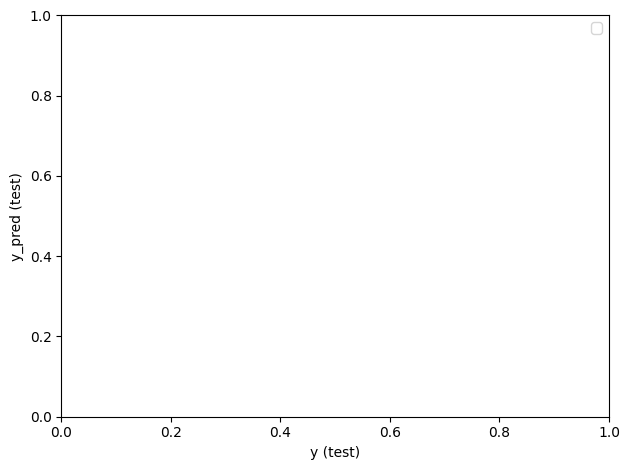

In [104]:

ax.plot(lims, lims, 'k', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')

# Plots a black ('k') 45-degree line (lims) with an alpha (transparency) of 0.75. This line represents the scenario where predicted values perfectly match actual values.
# Points above or below this line indicate overestimation or underestimation, respectively
# The zorder parameter determines the drawing order, ensuring that the line is behind other plot elements.

# The 45-degree line represents perfect predictions, and 
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_test_predict) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.9924425302594505


In [75]:
linear_model.get_params(deep=True) ## Returns the parameters of the estimator.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [59]:
linear_model.score(X_reshaped, y, sample_weight=None) # Returns the coefficient of determination R^2 of the prediction.

0.9926520536896748

In [61]:
linear_model.n_features_in_ # Number of features seen during 'fit'

1

In [62]:
linear_model.n_jobs # Number of CPU cores used during the fit process.

### MULTIPLE LINEAR REGRESSION

In [106]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + np.random.randn(n)

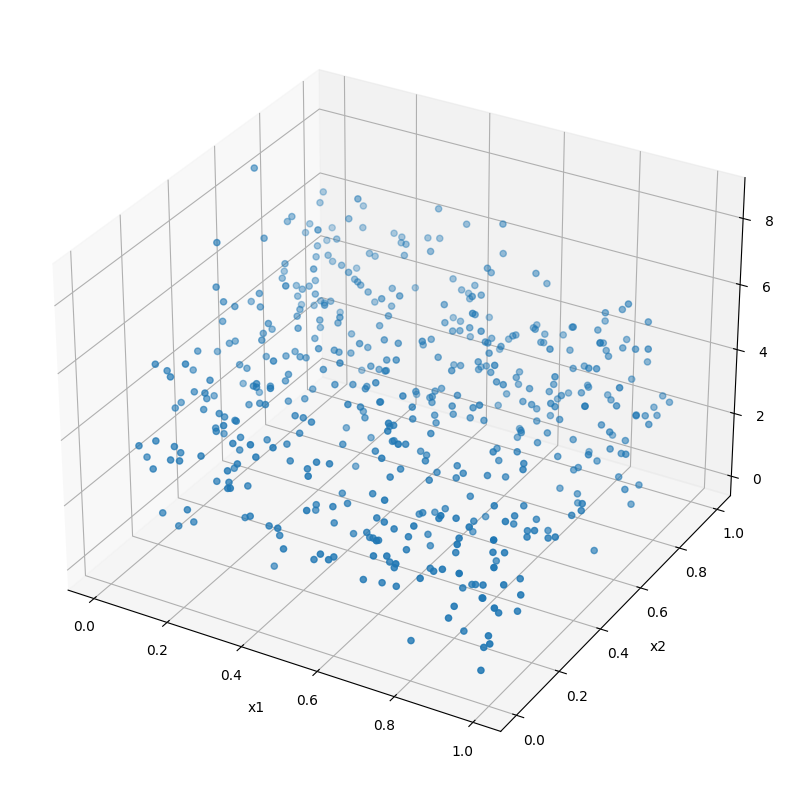

In [121]:
# Imports the Axes3D class from mpl_toolkits.mplot3d. This is necessary for creating 3D plots.
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# The function takes three input arrays (x1, x2, and y) representing coordinates in a three-dimensional space and plots them in a 3D scatter plot.
# If ax and fig are not provided, the function creates a new figure and 3D axis.

# Adds a 3D subplot (ax) to the figure. The 111 in add_subplot(111) indicates a single subplot in a 1x1 grid,
# and the projection='3d' parameter specifies that this subplot should have a 3D projection.

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (15,10))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [115]:
# Creates a 2D array X by vertically stacking the arrays x1 and x2 and then transposing the result.
# is a NumPy function that vertically stacks arrays. It takes a tuple of arrays as its argument and stacks them vertically, one on top of the other.
# In this case, it's stacking the arrays x1 and x2 vertically.


# The .T is the transpose operation in NumPy. It swaps the rows and columns of the resulting array.
# In this context, it transposes the vertically stacked array, effectively converting the vertical stacking into horizontal stacking.
# The final result, X, is a 2D array where each row corresponds to a data point, and the columns represent the features x1 and x2.

X = np.vstack((x1,x2)).T

In [122]:
# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye dos atributos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(350, 2) (350,) (150, 2) (150,)


In [123]:
# Instanciamos nuestra regresión lineal y la entrenamos

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [124]:
# Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [-2.41317411  2.06327526]
La ordenada al origen del modelo de regresión lineal es: 3.695127722291833


In [125]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

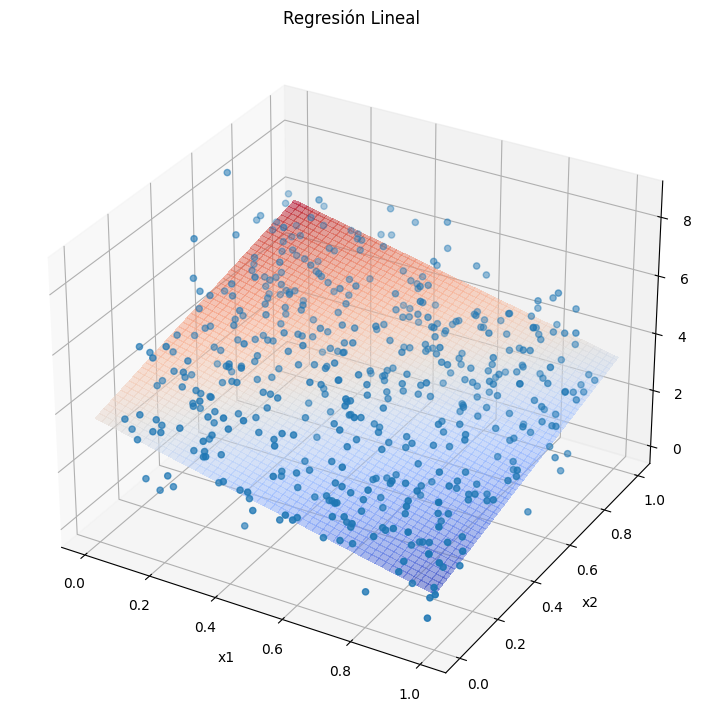

In [126]:
fig = plt.figure(figsize = (30,15))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

Raíz del error cuadrático medio en Train: 0.960915480216299
Raíz del error cuadrático medio en Test: 1.0303476011835426


C:\Users\user\AppData\Local\Temp\ipykernel_15628\1018331196.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\user\AppData\Local\Temp\ipykernel_15628\1018331196.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pr

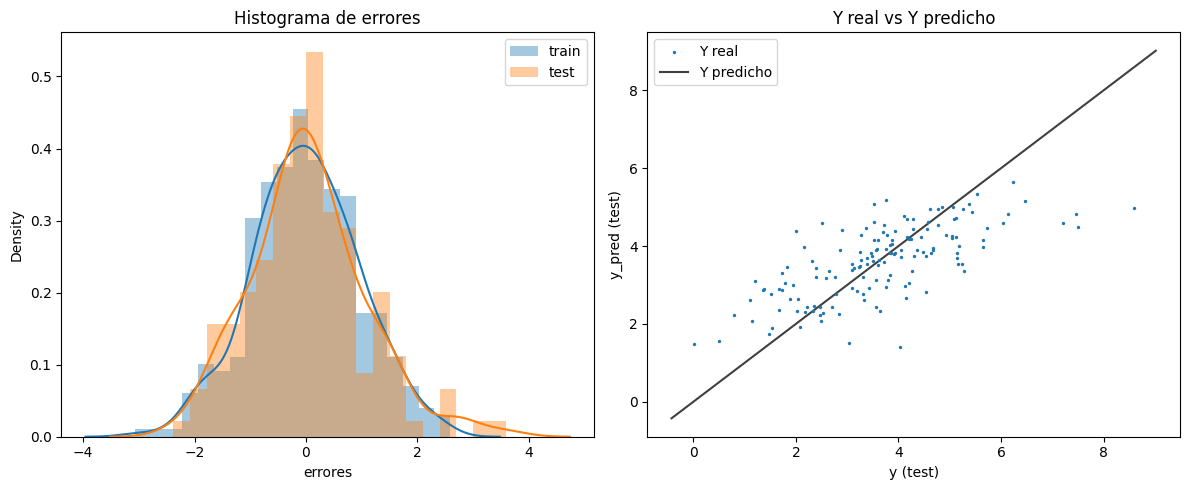

In [127]:
from sklearn.metrics import mean_squared_error

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =2, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predicho')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.legend()
plt.tight_layout()
plt.show()